## Rungefunktion $f(x)=\frac{1}{1+x^2}$

### Lagrange Interpolierende vom Grad $\leq5$ in 6 Stellen $(x_1=-5, x_2=-3, x_3=-1, x_4=1, x_5=3, x_6=5)$

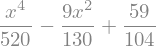

In [126]:
import sympy as sp
sp.init_printing()
from sympy import *

x = symbols("x")
l_1 = Rational(1, (-5+3)*(-5+1)*(-5-1)*(-5-3)*(-5-5))*((x+3)*(x+1)*(x-1)*(x-3)*(x-5))
l_2 = Rational(1, (-3+5)*(-3+1)*(-3-1)*(-3-3)*(-3-5))*((x+5)*(x+1)*(x-1)*(x-3)*(x-5))
l_3 = Rational(1, (-1+5)*(-1+3)*(-1-1)*(-1-3)*(-1-5))*((x+5)*(x+3)*(x-1)*(x-3)*(x-5))
l_4 = Rational(1, (1+5)*(1+3)*(1+1)*(1-3)*(1-5))*((x+5)*(x+3)*(x+1)*(x-3)*(x-5))
l_5 = Rational(1, (3+5)*(3+3)*(3+1)*(3-1)*(3-5))*((x+5)*(x+3)*(x+1)*(x-1)*(x-5))
l_6 = Rational(1, (5+5)*(5+3)*(5+1)*(5-1)*(5-3))*((x+5)*(x+3)*(x+1)*(x-1)*(x-3))
f_interpol = Rational(1,26)*l_1+Rational(1,10)*l_2+Rational(1,2)*l_3+Rational(1,2)*l_4+Rational(1,10)*l_5+Rational(1,26)*l_6

f_l = expand(f_interpol) #f = simplify(f_interpol)
f_l

Da Punkte $(x_i, f_i)$ symmetrisch zu $x=0$, ergibt sich eine gerade Funktion: Polynom vom Grad $4$ mit nur geraden Potenzen statt Polynom vom Grad $5$! Spezialfall hier! 

In [140]:
# Test der Interpolation bei x=-5, f(x)=1/26
f_l.subs(x, -5)

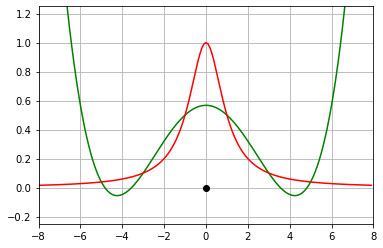

In [141]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

xx = np.arange(-8, 8, 0.1) # x-Werte
sf = lambda arg: float(f_l.evalf(subs={x: arg})) # fuer einzelne
vf = np.vectorize(sf)                            # fuer arrays
yy = vf(xx)                # y-Werte der Wertetabelle
plt.plot(xx, yy, 'g-')                 # Plot der Lagrange Interpolierenden

plt.plot(xx, 1.0/(1+xx**2), 'r-')      # Plot der Rungefunktion

plt.plot([ 0], [0], 'ko-') # Nullpunkt
plt.axis([-8, 8, -0.25, 1.25])
plt.grid(True)
plt.show() 

### Taylorpolynom vom Grad $3$

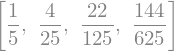

In [167]:
f = 1/(1+x**2)
# Stelle x=-2
df_1 = f.diff(x)
df_2 = df_1.diff(x)
df_3 = df_2.diff(x)
f_3=df_3.subs(x, -2)
f_2=df_2.subs(x, -2)
f_1=df_1.subs(x, -2)
f_0=f.subs(x, -2)
f_m2_taylor= f_0 +f_1*(x+2) +f_2*Rational(1,2)*(x+2)**2 +f_3*Rational(1,6)*(x+2)**3

# Stelle x=0
df_1 = f.diff(x)
df_2 = df_1.diff(x)
df_3 = df_2.diff(x)
ff_3=df_3.subs(x, 0)
ff_2=df_2.subs(x, 0)
ff_1=df_1.subs(x, 0)
ff_0=f.subs(x, 0)
f_0_taylor= ff_0 +ff_1*x +ff_2*Rational(1,2)*x**2 +ff_3*Rational(1,6)*x**3

[f_0, f_1, f_2, f_3]

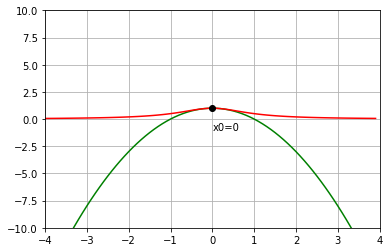

In [168]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

xx = np.arange(-4, 4, 0.1) # x-Werte
sf = lambda arg: float(f_0_taylor.evalf(subs={x: arg})) # fuer einzelne
vf = np.vectorize(sf)                                 # fuer arrays
yy = vf(xx) # y = f(x)
plt.plot(xx, yy, 'g-')                 # Plot des Taylorpolynom

plt.plot(xx, 1.0/(1+xx**2), 'r-')      # Plot der Rungefunktion

plt.plot([0], [1], 'ko-') # Stelle
plt.text(0, -1, 'x0=0')
plt.axis([-4, 4, -10, 10])
plt.grid(True)
plt.show() 

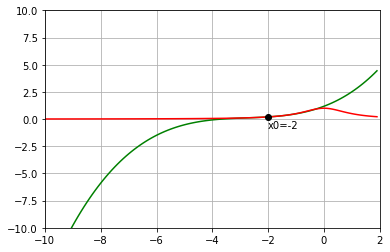

In [166]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

xx = np.arange(-10, 2, 0.1) # x-Werte
sf = lambda arg: float(f_m2_taylor.evalf(subs={x: arg})) # fuer einzelne
vf = np.vectorize(sf)                                 # fuer arrays
yy = vf(xx) # y = f(x)
plt.plot(xx, yy, 'g-')                 # Plot des Taylorpolynom

plt.plot(xx, 1.0/(1+xx**2), 'r-')      # Plot der Rungefunktion

plt.plot([ -2], [1.0/(1+(-2)**2)], 'ko-') # Stelle
plt.text( -2, 1.0/(1+(-2)**2)-1, "x0=-2")
plt.axis([-10, 2, -10, 10])
plt.grid(True)
plt.show() 